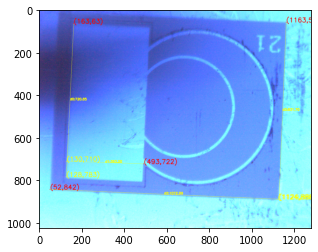

[[163, 63], [493, 722], [52, 842], [1163, 57]]
[[128, 783], [130, 710], [1124, 888], [1129, 888]]
[ 720.85019248  363.19829295 1072.9864864   831.69525669]


In [7]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

distances=[]
pointsl=[]
pointsr=[]
nx=[]
ny=[]
mp=[]
lcount=0
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, param):

    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        pointsl.append([x,y])

        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, '('+str(x) + ',' + str(y)+')', (x,y), font, 1, (255, 0, 0), 2)
        cv2.circle(img, (x,y), 2, (255,0,0),thickness=-1)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
        pointsr.append([x,y])
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'(' + str(x) + ',' + str(y) + ')', (x,y), font, 1, (255, 255, 0), 2)
        cv2.circle(img, (x,y), 2, (255,255,0),thickness=-1)
        # drawing line between points with its distance
        if len(pointsl)==len(pointsr):
            for i in range(len(pointsr)):
                cv2.line(img, pointsl[i],pointsr[i], (255,255,0),1)
                
            mp.append([(pointsl[param[0]][0]+pointsr[param[0]][0])/2,(pointsl[param[0]][1]+pointsr[param[0]][1])/2])
            cv2.putText(img,'d'+str(param[0])+':'+str("%.2f"%math.dist(pointsl[param[0]],pointsr[param[0]])), 
                        (int(mp[param[0]][0]),int(mp[param[0]][1])),   # coordinates of the middle of the line
                        font, 0.5, (255,255,0), 2) # Customization of text displayed
            param[0]+=1
            
        cv2.imshow('image', img) 
 
img = cv2.imread('23-11-21-10x-QWells.bmp')   
cv2.imshow('image', img)
 
# setting mouse handler for the image    
param=[lcount] # sends additional parameter to the function for control of distances measured
cv2.setMouseCallback('image', click_event, param) 

cv2.waitKey(0)
cv2.destroyAllWindows()

distances=np.diagonal(cdist(pointsl,pointsr,'euclidean'))
#cv2.imwrite('test.jpg',img)
plt.imshow(img)
plt.show()
print(pointsl)
print(pointsr)
print(distances)